In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from prophet import Prophet

In [2]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [3]:
wmt

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400
...,...,...,...,...,...,...,...
11810,2019-06-26,110.849998,111.080002,110.099998,110.160004,110.160004,4161700
11811,2019-06-27,110.059998,110.510002,108.860001,110.099998,110.099998,5481300
11812,2019-06-28,110.550003,111.510002,110.239998,110.489998,110.489998,6506700
11813,2019-07-01,111.300003,111.970001,110.019997,110.620003,110.620003,5514700


In [4]:
wmt.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
wmt.describe()

,Open,High,Low,Close,Adj Close,Volume
count,11815.000000,11815.000000,11815.000000,11815.000000,11815.000000,1.181500e+04
mean,29.942336,30.226543,29.658511,29.948090,24.052813,7.510762e+06
std,29.802418,30.051176,29.566506,29.811830,26.403796,6.327371e+06
min,0.015625,0.015625,0.014404,0.015625,0.005798,0.000000e+00
25%,1.265625,1.281250,1.253906,1.265625,0.513472,3.753600e+06
50%,13.718750,13.843750,13.562500,13.687500,8.964169,6.263200e+06
75%,54.000000,54.570000,53.500000,54.000000,40.389094,9.515000e+06
max,111.489998,112.220001,111.029999,111.599998,111.599998,1.318336e+08


In [6]:
wmt.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

* use only `Date` and `Adj Close` columns

In [7]:
wmt = wmt.iloc[:,[0,-2]]

In [8]:
wmt.head(3)

,Date,Adj Close
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408


* rename columns to fit Prophet naming convention

In [9]:
wmt = wmt.rename(columns={'Date':'ds', 'Adj Close':'y'})
wmt.head(3)

,ds,y
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408


* convert date to datetime

In [11]:
wmt['ds'] = pd.to_datetime(wmt['ds'])
wmt.dtypes

ds    datetime64[ns]
y            float64
dtype: object

* plot time-series

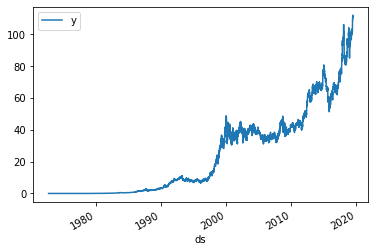

In [20]:
wmt.plot(x='ds', y='y')
plt.show()

* instantiate Prophet

In [12]:
m = Prophet()

* fit model

In [12]:
m.fit(wmt)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


* forecast 365 values in future 

In [21]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
12175,2020-06-27
12176,2020-06-28
12177,2020-06-29
12178,2020-06-30
12179,2020-07-01


* plot forecast

In [22]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1972-08-25,-0.017737,-4.848003,3.961530,-0.017737,-0.017737,-0.391165,-0.391165,-0.391165,-0.017021,-0.017021,-0.017021,-0.374144,-0.374144,-0.374144,0.0,0.0,0.0,-0.408902
1,1972-08-28,-0.017614,-4.869558,4.145949,-0.017614,-0.017614,-0.392051,-0.392051,-0.392051,-0.009712,-0.009712,-0.009712,-0.382338,-0.382338,-0.382338,0.0,0.0,0.0,-0.409665
2,1972-08-29,-0.017573,-4.767943,4.551739,-0.017573,-0.017573,-0.377321,-0.377321,-0.377321,0.006197,0.006197,0.006197,-0.383518,-0.383518,-0.383518,0.0,0.0,0.0,-0.394894
3,1972-08-30,-0.017533,-4.805175,4.353073,-0.017533,-0.017533,-0.394036,-0.394036,-0.394036,-0.009966,-0.009966,-0.009966,-0.384069,-0.384069,-0.384069,0.0,0.0,0.0,-0.411568
4,1972-08-31,-0.017492,-5.182025,4.077885,-0.017492,-0.017492,-0.395757,-0.395757,-0.395757,-0.011646,-0.011646,-0.011646,-0.384111,-0.384111,-0.384111,0.0,0.0,0.0,-0.413249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,2020-06-27,96.535268,91.801234,101.224040,95.711376,97.340443,-0.000239,-0.000239,-0.000239,0.021074,0.021074,0.021074,-0.021313,-0.021313,-0.021313,0.0,0.0,0.0,96.535029
12176,2020-06-28,96.550113,91.922591,101.447392,95.723519,97.374950,-0.012330,-0.012330,-0.012330,0.021074,0.021074,0.021074,-0.033404,-0.033404,-0.033404,0.0,0.0,0.0,96.537783
12177,2020-06-29,96.564958,91.746560,101.559107,95.735661,97.395640,-0.054226,-0.054226,-0.054226,-0.009712,-0.009712,-0.009712,-0.044514,-0.044514,-0.044514,0.0,0.0,0.0,96.510731
12178,2020-06-30,96.579802,91.705691,101.869788,95.747804,97.415215,-0.048425,-0.048425,-0.048425,0.006197,0.006197,0.006197,-0.054622,-0.054622,-0.054622,0.0,0.0,0.0,96.531377


* plot components

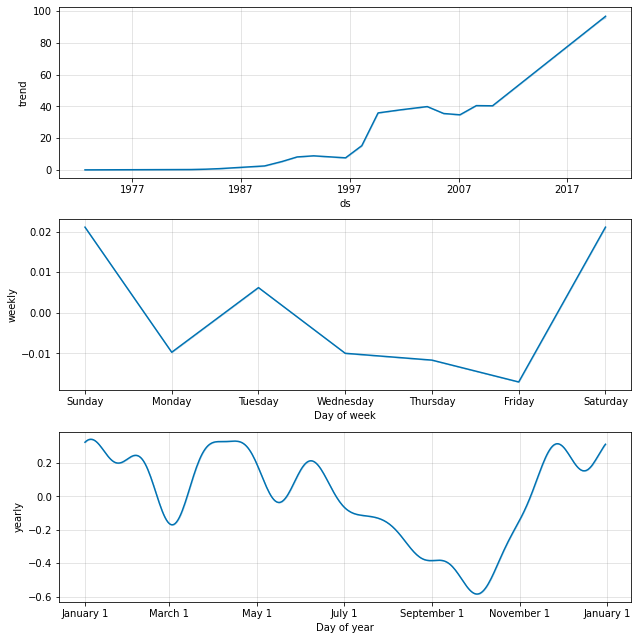

In [23]:
fig2 = m.plot_components(forecast)

- Compare the Prophet prediction vs Arima. Use the last 7 values we have in the timeseries as ground truth.

In [29]:
series = pd.Series(data=wmt['y'].values, index=wmt['ds'])
series

ds
1972-08-25      0.023768
1972-08-28      0.023678
1972-08-29      0.023408
1972-08-30      0.023408
1972-08-31      0.023047
                 ...    
2019-06-26    110.160004
2019-06-27    110.099998
2019-06-28    110.489998
2019-07-01    110.620003
2019-07-02    111.599998
Length: 11815, dtype: float64

In [33]:
df = pd.DataFrame(data=wmt['y'].values, index=wmt['ds'])
df

,0
ds,
1972-08-25,0.023768
1972-08-28,0.023678
1972-08-29,0.023408
1972-08-30,0.023408
1972-08-31,0.023047
...,...
2019-06-26,110.160004
2019-06-27,110.099998
2019-06-28,110.489998


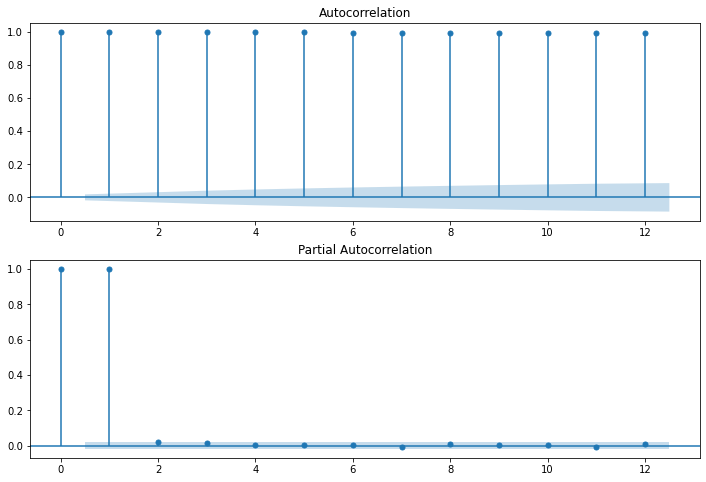

In [34]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8)) 
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212) 
fig = plot_pacf(df,lags=12,ax=ax2)
fig = plot_acf(df,lags=12,ax=ax1)

In [37]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series[:-30], order=(2,1,2))
results = model.fit(disp=-1)

F:\Anaconda\envs\lhl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\envs\lhl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [40]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                11784
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8354.364
Method:                       css-mle   S.D. of innovations              0.492
Date:                Tue, 14 Sep 2021   AIC                          16720.729
Time:                        10:23:27   BIC                          16764.976
Sample:                             1   HQIC                         16735.585
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0086      0.004      2.257      0.024       0.001       0.016
ar.L1.D.y      0.2004      0.165      1.217      0.224      -0.122       0.523
ar.L2.D.y      0.2474      0.122      2.034      0.0

In [50]:
series.index[-1]

Timestamp('2019-07-02 00:00:00')

In [53]:
results.predict(start=len(series)-30, end=len(series))

F:\Anaconda\envs\lhl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


11784   -0.010607
11785   -0.042147
11786   -0.006317
11787   -0.006940
11788    0.001798
11789    0.003395
11790    0.005876
11791    0.006769
11792    0.007561
11793    0.007941
11794    0.008213
11795    0.008361
11796    0.008458
11797    0.008514
11798    0.008550
11799    0.008571
11800    0.008583
11801    0.008591
11802    0.008596
11803    0.008599
11804    0.008601
11805    0.008602
11806    0.008602
11807    0.008603
11808    0.008603
11809    0.008603
11810    0.008603
11811    0.008603
11812    0.008603
11813    0.008603
11814    0.008603
dtype: float64

predicted=68.067228, expected=67.586182
predicted=67.542825, expected=66.823090
predicted=67.072579, expected=66.370872
predicted=66.438538, expected=66.662941
predicted=66.673461, expected=65.975204
predicted=66.000654, expected=65.833878
predicted=65.967520, expected=65.824455
predicted=65.778256, expected=66.242035
predicted=66.213367, expected=66.298973
predicted=66.229840, expected=66.526749
predicted=66.525489, expected=66.384392
predicted=66.361965, expected=67.115135
predicted=67.061969, expected=66.982277
predicted=66.893227, expected=66.849403
predicted=66.939420, expected=66.327438
predicted=66.373385, expected=66.412849
predicted=66.471523, expected=66.336929
predicted=66.299863, expected=66.669098
predicted=66.658369, expected=66.298973
predicted=66.292566, expected=66.061722
predicted=66.162186, expected=66.109169
predicted=66.095644, expected=66.735535
predicted=66.652327, expected=67.134117
predicted=67.013028, expected=67.940788
predicted=67.836819, expected=68.405815


F:\Anaconda\envs\lhl\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=95.022301, expected=95.833519
predicted=95.886192, expected=95.930145
predicted=95.947765, expected=96.065453
predicted=96.042444, expected=95.437256
predicted=95.427894, expected=95.282616
predicted=95.261313, expected=96.113777


F:\Anaconda\envs\lhl\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=96.026885, expected=96.200760
predicted=96.105749, expected=96.770966
predicted=96.664078, expected=98.201317
predicted=97.958203, expected=97.022247
predicted=96.931617, expected=96.326385
predicted=96.354526, expected=96.664642
predicted=96.842593, expected=97.486137


F:\Anaconda\envs\lhl\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=97.555950, expected=97.312187
predicted=97.390668, expected=99.254753
predicted=99.253752, expected=100.801079
predicted=100.696069, expected=101.081345
predicted=100.967406, expected=101.912491


F:\Anaconda\envs\lhl\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=101.605672, expected=102.347404
predicted=102.221636, expected=102.241089
predicted=102.184779, expected=103.023911
predicted=102.987639, expected=104.753868
predicted=104.699776, expected=105.874954
predicted=105.906247, expected=104.116013
predicted=104.257794, expected=103.023911
predicted=103.290076, expected=101.980148
predicted=102.330021, expected=100.975037
predicted=101.357790, expected=96.732307
predicted=97.114289, expected=97.515137


F:\Anaconda\envs\lhl\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=97.518005, expected=99.399712
predicted=99.315463, expected=96.664642
predicted=96.701443, expected=96.036453
predicted=96.297551, expected=96.210426
predicted=96.241234, expected=97.592453


F:\Anaconda\envs\lhl\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=97.357059, expected=98.288284


F:\Anaconda\envs\lhl\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=98.111520, expected=99.766975
predicted=99.676365, expected=101.264969
predicted=101.161678, expected=90.952927
predicted=91.699550, expected=88.449799
predicted=89.485052, expected=89.657860
predicted=90.118899, expected=89.773834
predicted=89.837697, expected=89.996132
predicted=90.043761, expected=88.449799
predicted=88.464185, expected=86.990463
predicted=87.172362, expected=86.091652
predicted=86.279456, expected=85.792053
predicted=85.917495, expected=86.961472
predicted=87.004238, expected=86.072327
predicted=85.984451, expected=84.796608
predicted=84.888344, expected=85.477158
predicted=85.606413, expected=86.254936
predicted=86.196823, expected=85.623001
predicted=85.547082, expected=85.846603
predicted=85.895382, expected=85.234108
predicted=85.227547, expected=85.078560
predicted=85.143555, expected=86.692429
predicted=86.689571, expected=85.020218
predicted=84.892466, expected=85.506317
predicted=85.649997, expected=85.729935
predicted=85.683574, expected=84.71883

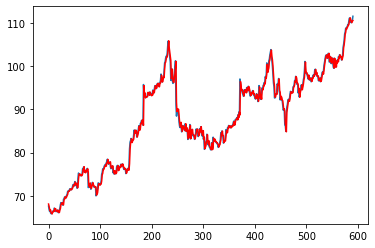

In [56]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X = series.values
size = int(len(X) * 0.95)
train, test = X[11000:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [58]:
forecast[(forecast['ds'] >= '2019-06-23') & (forecast['ds'] <= '2019-07-02')]['yhat']

11808    91.079533
11809    91.095118
11810    91.079317
11811    91.078799
11812    91.075471
11813    91.094748
11814    91.116648
Name: yhat, dtype: float64